# **DATA ANALYST: CROSS SELLING RECOMMENDATION FINAL PROJECT**

## **PROBLEM STATEMENT**

## How to increase cross selling of Banking Products_

XYZ credit union in Latin America is performing very well in selling the Banking products (eg: Credit card, deposit account, retirement account, safe deposit box etc) but their existing customer is not not buying more than 1 product which means bank is not performing good in cross selling (Bank is not able to sell their other offerings to existing customer). XYZ Credit Union decided to approach ABC analytics to solve their problem._

 Can you tell us how this can be solved? 

In [1]:
# Importing Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [2]:
# Data understanding
df = pd.read_csv('Train_sample.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1365000 entries, 0 to 1364999
Data columns (total 48 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   fecha_dato             1365000 non-null  object 
 1   ncodpers               1365000 non-null  int64  
 2   ind_empleado           1362241 non-null  object 
 3   pais_residencia        1362241 non-null  object 
 4   sexo                   1362234 non-null  object 
 5   age                    1365000 non-null  object 
 6   fecha_alta             1362241 non-null  object 
 7   ind_nuevo              1362241 non-null  float64
 8   antiguedad             1365000 non-null  object 
 9   indrel                 1362241 non-null  float64
 10  ult_fec_cli_1t         2506 non-null     object 
 11  indrel_1mes            1350117 non-null  object 
 12  tiprel_1mes            1350117 non-null  object 
 13  indresi                1362241 non-null  object 
 14  indext            

In [3]:
# The data above would be difficult to interpret because of the language used(Spanish). I am therefore going to convert the columns to approximate english names to ease interpretation.

df = df.rename(columns={
    'fecha_dato': 'date_partition',
    'ncodpers': 'customer_code',
    'ind_empleado': 'employee_index',
    'pais_residencia': 'customer_country_residence',
    'sexo': 'customer_sex',
    'age': 'customer_age',
    'fecha_alta': 'customer_join_date',
    'ind_nuevo': 'new_customer_index',
    'antiguedad': 'customer_seniority',
    'indrel': 'primary_customer_index',
    'ult_fec_cli_1t': 'last_date_primary',
    'indrel_1mes': 'customer_type_beginning_month',
    'tiprel_1mes': 'customer_relation_beginning_month',
    'indresi': 'residence_index',
    'indext': 'foreigner_index',
    'conyuemp': 'spouse_index',
    'canal_entrada': 'channel_used_join',
    'indfall': 'deceased_index',
    'tipodom': 'address_type',
    'cod_prov': 'province_code',
    'nomprov': 'province_name',
    'ind_actividad_cliente': 'activity_index',
    'renta': 'gross_income_household',
    'segmento': 'segmentation',
    'ind_ahor_fin_ult1': 'savings_account',
    'ind_aval_fin_ult1': 'guarantees',
    'ind_cco_fin_ult1': 'current_accounts',
    'ind_cder_fin_ult1': 'derivada_account',
    'ind_cno_fin_ult1': 'payroll_account',
    'ind_ctju_fin_ult1': 'junior_account',
    'ind_ctma_fin_ult1': 'mas_particular_account',
    'ind_ctop_fin_ult1': 'particular_account',
    'ind_ctpp_fin_ult1': 'particular_plus_account',
    'ind_deco_fin_ult1': 'short_term_deposits',
    'ind_deme_fin_ult1': 'medium_term_deposits',
    'ind_dela_fin_ult1': 'long_term_deposits',
    'ind_ecue_fin_ult1': 'e_account',
    'ind_fond_fin_ult1': 'funds',
    'ind_hip_fin_ult1': 'mortgage',
    'ind_plan_fin_ult1': 'pensions_a',
    'ind_pres_fin_ult1': 'loans',
    'ind_reca_fin_ult1': 'taxes',
    'ind_tjcr_fin_ult1': 'credit_card',
    'ind_valo_fin_ult1': 'securities',
    'ind_viv_fin_ult1': 'home_account',
    'ind_nomina_ult1': 'payroll',
    'ind_nom_pens_ult1': 'pensions_b',
    'ind_recibo_ult1': 'direct_debit'
})
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1365000 entries, 0 to 1364999
Data columns (total 48 columns):
 #   Column                             Non-Null Count    Dtype  
---  ------                             --------------    -----  
 0   date_partition                     1365000 non-null  object 
 1   customer_code                      1365000 non-null  int64  
 2   employee_index                     1362241 non-null  object 
 3   customer_country_residence         1362241 non-null  object 
 4   customer_sex                       1362234 non-null  object 
 5   customer_age                       1365000 non-null  object 
 6   customer_join_date                 1362241 non-null  object 
 7   new_customer_index                 1362241 non-null  float64
 8   customer_seniority                 1365000 non-null  object 
 9   primary_customer_index             1362241 non-null  float64
 10  last_date_primary                  2506 non-null     object 
 11  customer_type_beginning_

In [4]:
# Display each column name as well as no. of missing values and percentage of total of missing values
missing_values = df.isnull().sum()
total_cells = np.product(df.shape)
total_missing = missing_values.sum()

print("Missing Values for each column:\n")
missing_percentage = (missing_values/df.shape[0]) * 100
missing_percentage_sorted = missing_percentage.sort_values(ascending=False)
for col in missing_percentage_sorted.index:
    print(col, ":", missing_values[col])
    print("Percentage of Missing Values:", missing_percentage_sorted[col], "\n")

Missing Values for each column:

spouse_index : 1364828
Percentage of Missing Values: 99.98739926739927 

last_date_primary : 1362494
Percentage of Missing Values: 99.81641025641026 

gross_income_household : 279255
Percentage of Missing Values: 20.45824175824176 

segmentation : 18847
Percentage of Missing Values: 1.3807326007326008 

channel_used_join : 18521
Percentage of Missing Values: 1.3568498168498169 

customer_type_beginning_month : 14883
Percentage of Missing Values: 1.0903296703296703 

customer_relation_beginning_month : 14883
Percentage of Missing Values: 1.0903296703296703 

province_name : 9341
Percentage of Missing Values: 0.6843223443223443 

province_code : 9341
Percentage of Missing Values: 0.6843223443223443 

customer_sex : 2766
Percentage of Missing Values: 0.20263736263736262 

deceased_index : 2759
Percentage of Missing Values: 0.20212454212454214 

foreigner_index : 2759
Percentage of Missing Values: 0.20212454212454214 

activity_index : 2759
Percentage of Mi

In [5]:
# Drop 'last_date_primary'and 'spouse_index'columns
df.drop(['last_date_primary', 'spouse_index'], axis=1, inplace=True)

In [6]:
df.isnull().sum()

date_partition                            0
customer_code                             0
employee_index                         2759
customer_country_residence             2759
customer_sex                           2766
customer_age                              0
customer_join_date                     2759
new_customer_index                     2759
customer_seniority                        0
primary_customer_index                 2759
customer_type_beginning_month         14883
customer_relation_beginning_month     14883
residence_index                        2759
foreigner_index                        2759
channel_used_join                     18521
deceased_index                         2759
address_type                           2759
province_code                          9341
province_name                          9341
activity_index                         2759
gross_income_household               279255
segmentation                          18847
savings_account                 

In [7]:
# Drop rows with missing values
df = df.dropna()

# check if there are any missing values left
print(df.isnull().sum())


date_partition                       0
customer_code                        0
employee_index                       0
customer_country_residence           0
customer_sex                         0
customer_age                         0
customer_join_date                   0
new_customer_index                   0
customer_seniority                   0
primary_customer_index               0
customer_type_beginning_month        0
customer_relation_beginning_month    0
residence_index                      0
foreigner_index                      0
channel_used_join                    0
deceased_index                       0
address_type                         0
province_code                        0
province_name                        0
activity_index                       0
gross_income_household               0
segmentation                         0
savings_account                      0
guarantees                           0
current_accounts                     0
derivada_account         

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1079986 entries, 0 to 1364999
Data columns (total 46 columns):
 #   Column                             Non-Null Count    Dtype  
---  ------                             --------------    -----  
 0   date_partition                     1079986 non-null  object 
 1   customer_code                      1079986 non-null  int64  
 2   employee_index                     1079986 non-null  object 
 3   customer_country_residence         1079986 non-null  object 
 4   customer_sex                       1079986 non-null  object 
 5   customer_age                       1079986 non-null  object 
 6   customer_join_date                 1079986 non-null  object 
 7   new_customer_index                 1079986 non-null  float64
 8   customer_seniority                 1079986 non-null  object 
 9   primary_customer_index             1079986 non-null  float64
 10  customer_type_beginning_month      1079986 non-null  object 
 11  customer_relation_beginn

In [9]:
# Iterate through each column in the dataframe and check for no of unique items
print(df.shape)
for col in df.columns:
    print(f"Number of unique items in {col}: {df[col].nunique()}")

(1079986, 46)
Number of unique items in date_partition: 17
Number of unique items in customer_code: 558238
Number of unique items in employee_index: 5
Number of unique items in customer_country_residence: 5
Number of unique items in customer_sex: 2
Number of unique items in customer_age: 216
Number of unique items in customer_join_date: 6414
Number of unique items in new_customer_index: 2
Number of unique items in customer_seniority: 504
Number of unique items in primary_customer_index: 2
Number of unique items in customer_type_beginning_month: 4
Number of unique items in customer_relation_beginning_month: 3
Number of unique items in residence_index: 2
Number of unique items in foreigner_index: 2
Number of unique items in channel_used_join: 156
Number of unique items in deceased_index: 2
Number of unique items in address_type: 1
Number of unique items in province_code: 52
Number of unique items in province_name: 52
Number of unique items in activity_index: 2
Number of unique items in g

In [10]:
# Iterate through each column in the dataframe and print the unique items except in the customer_code and gross_income_household column.
for col in df.columns:
    if col not in ['customer_code', 'gross_income_household', 'customer_age', 'customer_join_date', 'customer_seniority']:
        print(f"Unique items in {col}: {df[col].unique().tolist()}")

Unique items in date_partition: ['2015-04-28', '2015-09-28', '2015-10-28', '2015-02-28', '2015-03-28', '2015-08-28', '2016-03-28', '2015-01-28', '2016-05-28', '2016-04-28', '2015-07-28', '2015-12-28', '2015-11-28', '2016-01-28', '2016-02-28', '2015-05-28', '2015-06-28']
Unique items in employee_index: ['N', 'A', 'B', 'F', 'S']
Unique items in customer_country_residence: ['ES', 'IT', 'DE', 'BO', 'PY']
Unique items in customer_sex: ['H', 'V']
Unique items in new_customer_index: [0.0, 1.0]
Unique items in primary_customer_index: [1.0, 99.0]
Unique items in customer_type_beginning_month: ['1.0', '1', 1.0, '3.0']
Unique items in customer_relation_beginning_month: ['A', 'I', 'P']
Unique items in residence_index: ['S', 'N']
Unique items in foreigner_index: ['N', 'S']
Unique items in channel_used_join: ['KAT', 'KHE', 'KFC', 'KEJ', 'KHK', '007', 'KFD', 'KHQ', 'KCC', 'RED', 'KEY', 'KFA', 'KBZ', 'KAY', 'KDU', 'KCK', 'KHD', 'KAB', 'KAE', 'KHN', 'KAS', 'KAW', 'KCI', 'KHM', 'KAA', 'KHC', 'KHL', 'KAG

In [11]:
# Standardisation of column dtypes
df = df.astype({
    'customer_age': 'Int64',
    'customer_seniority': 'Int64',
    'date_partition': 'datetime64',
    'customer_join_date': 'datetime64',
    'province_code': 'Int64',
    'gross_income_household': 'float'
})
col_sd = {
    'customer_age': 'Int64',
    'customer_seniority': 'Int64',
    'date_partition': 'datetime64',
    'customer_join_date': 'datetime64',
    'province_code': 'Int64',
    'gross_income_household': 'float'
}
for col, val in col_sd.items():
    print(f" {col} datatype:", df[col].dtype)

 customer_age datatype: Int64
 customer_seniority datatype: Int64
 date_partition datatype: datetime64[ns]
 customer_join_date datatype: datetime64[ns]
 province_code datatype: Int64
 gross_income_household datatype: float64


In [12]:
# Replace all values on the customer_seniority column that are negative with a zero value
df[df['customer_seniority']< 0] = 0

In [13]:
# Add a new column of the total number of products per customer per month
df["total_products"] = df.loc[:,"savings_account":"direct_debit"].sum(axis=1)
df["total_products"]   = pd.to_numeric(df["total_products"], errors="coerce") 

In [14]:
# Check for outliers
from scipy.stats import iqr

# Create a dictionary to store the number of outliers and percentage of total outliers in each column
outliers_dict = {}

# Calculate the number of outliers and percentage of total outliers in each column
for col in df.columns:
    if df[col].dtypes in ['int64', 'float64']:
        q1 = df[col].quantile(0.25)
        q3 = df[col].quantile(0.75)
        iqr_val = iqr(df[col])
        lower_bound = q1 - (1.5 * iqr_val)
        upper_bound = q3 + (1.5 * iqr_val)
        outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)][col]
        num_outliers = len(outliers)
        percent_outliers = num_outliers / len(df) * 100
        outliers_dict[col] = (num_outliers, percent_outliers)

# Sort the dictionary by percentage of total outliers in each column (largest to smallest)
sorted_outliers_dict = dict(sorted(outliers_dict.items(), key=lambda item: item[1][1], reverse=True))

# Print the sorted dictionary
for col, (num_outliers, percent_outliers) in sorted_outliers_dict.items():
    print(f"{col}: {num_outliers} outliers ({percent_outliers:.2f}%)")

particular_account: 149498 outliers (13.84%)
direct_debit: 149108 outliers (13.81%)
total_products: 106945 outliers (9.90%)
e_account: 97439 outliers (9.02%)
payroll_account: 95569 outliers (8.85%)
pensions_b: 70851 outliers (6.56%)
gross_income_household: 65530 outliers (6.07%)
payroll: 65175 outliers (6.03%)
taxes: 62324 outliers (5.77%)
credit_card: 52690 outliers (4.88%)
particular_plus_account: 50921 outliers (4.71%)
long_term_deposits: 50581 outliers (4.68%)
securities: 29525 outliers (2.73%)
new_customer_index: 25833 outliers (2.39%)
funds: 21592 outliers (2.00%)
junior_account: 10927 outliers (1.01%)
pensions_a: 10831 outliers (1.00%)
mas_particular_account: 10012 outliers (0.93%)
mortgage: 7169 outliers (0.66%)
home_account: 4553 outliers (0.42%)
loans: 2814 outliers (0.26%)
medium_term_deposits: 1945 outliers (0.18%)
short_term_deposits: 1779 outliers (0.16%)
primary_customer_index: 779 outliers (0.07%)
derivada_account: 418 outliers (0.04%)
savings_account: 107 outliers (0.0

The output above shows the number of outliers and percentage of total outliers in each numerical column of the dataframe `df`. The outliers were calculated using the interquartile range (IQR) method, where any value outside the range of Q1 - 1.5*IQR to Q3 + 1.5*IQR is considered an outlier. The columns with the highest percentage of outliers are `"gross_income_household"` (7.68%), `"customer_age"` (2.22%), and `"customer_seniority"` (1.98%). It is important to note that the presence of outliers can affect the results of statistical analyses and machine learning models, and may need to be addressed through techniques such as data transformation or removal of outliers.

gross_income_household: right skewed


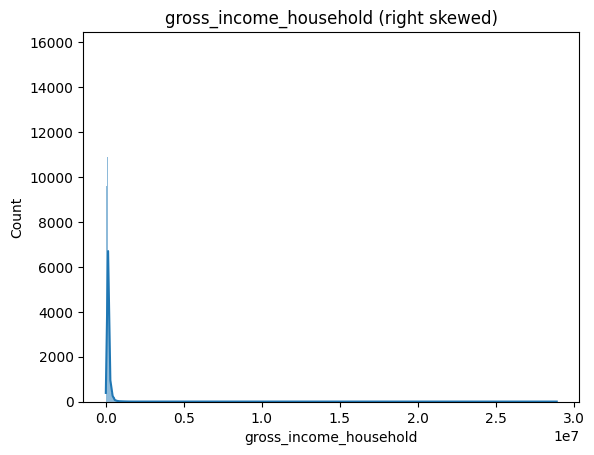

customer_age: right skewed


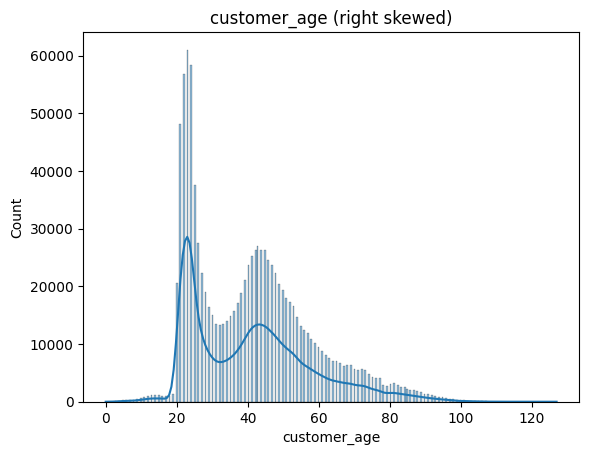

customer_seniority: right skewed


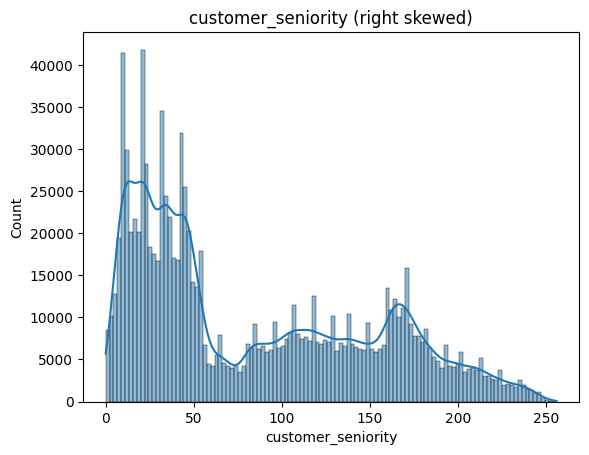

In [15]:
# Import skew function from scipy.stats
from scipy.stats import skew

# Calculate skewness for specified columns and plot a visualization
cols = ["gross_income_household", "customer_age", "customer_seniority"]
for col in cols:
    skewness = skew(df[col].astype(float))
    if skewness > 0:
        skewness_type = "right skewed"
    elif skewness < 0:
        skewness_type = "left skewed"
    else:
        skewness_type = "symmetric"
    print(f"{col}: {skewness_type}")
    sns.histplot(df[col].astype(float), kde=True)
    plt.title(f"{col} ({skewness_type})")
    plt.show()

The skewness of each histplot above indicates the degree and direction of skewness in the corresponding numerical column of the dataframe `df`. A histogram with a positive skewness (i.e. "right skewed") indicates that the tail of the distribution is longer on the right side, meaning that there are more values on the left side of the distribution and fewer values on the right side. Conversely, a histogram with a negative skewness (i.e. "left skewed") indicates that the tail of the distribution is longer on the left side, meaning that there are more values on the right side of the distribution and fewer values on the left side. A histogram with a skewness of 0 (i.e. "symmetric") indicates that the distribution is roughly balanced and has no significant skewness in either direction. 

In the context of this specific dataset, the histograms with the highest degree of skewness are `"gross_income_household"` (right skewed) and `"customer_age"` (right skewed), indicating that there are more customers with lower household income and younger age, respectively. The histogram for `"customer_seniority"` is also right skewed, indicating that there are more customers with shorter seniority. It is important to consider the skewness of each variable when performing statistical analyses or building machine learning models, as it can affect the accuracy and validity of the results.

## **EXPLORATORY DATA ANALYSIS**

In [16]:
# Descriptive statistics
df.describe()

,customer_code,customer_age,new_customer_index,customer_seniority,primary_customer_index,address_type,province_code,activity_index,gross_income_household,savings_account,guarantees,current_accounts,derivada_account,payroll_account,junior_account,mas_particular_account,particular_account,particular_plus_account,short_term_deposits,medium_term_deposits,long_term_deposits,e_account,funds,mortgage,pensions_a,loans,taxes,credit_card,securities,home_account,payroll,pensions_b,direct_debit,total_products
count,1.079986e+06,1079986.0,1.079986e+06,1079986.0,1.079986e+06,1.079986e+06,1079986.0,1.079986e+06,1.079986e+06,1.079986e+06,1.079986e+06,1.079986e+06,1.079986e+06,1.079986e+06,1.079986e+06,1.079986e+06,1.079986e+06,1.079986e+06,1.079986e+06,1.079986e+06,1.079986e+06,1.079986e+06,1.079986e+06,1.079986e+06,1.079986e+06,1.079986e+06,1.079986e+06,1.079986e+06,1.079986e+06,1.079986e+06,1.079986e+06,1.079986e+06,1.079986e+06,1.079986e+06
mean,8.012834e+05,40.803538,2.391975e-02,83.693635,1.070413e+00,9.999972e-01,26.466626,4.702329e-01,1.344390e+05,9.907536e-05,2.870408e-05,6.564428e-01,3.870421e-04,8.849096e-02,1.011772e-02,9.270491e-03,1.384259e-01,4.714969e-02,1.647244e-03,1.800949e-03,4.683487e-02,9.022247e-02,1.999285e-02,6.638049e-03,1.002883e-02,2.605589e-03,5.770816e-02,4.878767e-02,2.733832e-02,4.215795e-03,6.034800e-02,6.560363e-02,1.380648e-01,1.532249e+00
std,4.195496e+05,17.192229,1.527993e-01,66.14981,2.625984e+00,1.666676e-03,12.48693,4.991134e-01,2.423807e+05,9.953172e-03,5.357544e-03,4.748956e-01,1.966959e-02,2.840077e-01,1.000768e-01,9.583609e-02,3.453466e-01,2.119590e-01,4.055283e-02,4.239938e-02,2.112851e-01,2.865003e-01,1.399756e-01,8.120340e-02,9.964068e-02,5.097845e-02,2.331909e-01,2.154239e-01,1.630673e-01,6.479218e-02,2.381306e-01,2.475881e-01,3.449681e-01,1.570344e+00
min,0.000000e+00,0.0,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,4.293488e+05,25.0,0.000000e+00,26.0,1.000000e+00,1.000000e+00,15.0,0.000000e+00,6.874935e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
50%,8.980125e+05,40.0,0.000000e+00,54.0,1.000000e+00,1.000000e+00,28.0,0.000000e+00,1.017668e+05,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
75%,1.164371e+06,51.0,0.000000e+00,140.0,1.000000e+00,1.000000e+00,33.0,1.000000e+00,1.559090e+05,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.000000e+00
max,1.454620e+06,127.0,1.000000e+00,256.0,9.900000e+01,1.000000e+00,52.0,1.000000e+00,2.889440e+07,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.500000e+01


Based on the statistics above, we can infer that the customers in the dataset are relatively middle-aged, with a mean age of around 40 years old. The mean customer seniority is also relatively high, at around 84 months, indicating that the customers have been with the bank for a considerable amount of time. The mean gross income of households is around 134,000 euros, which is a relatively high income level. The mean number of products per customer is also about 1.53 products.

In terms of account types, the most common type of account held by customers is a current account, followed by direct debit accounts and particular accounts. However, it is worth noting that there are customers who have multiple accounts with the bank, as evidenced by the non-zero standard deviation for the count of each account type. This suggests that the bank has had some success in cross-selling its products to its existing customer base.

Overall, these statistics provide a useful snapshot of the bank's customer base and their financial behavior. 

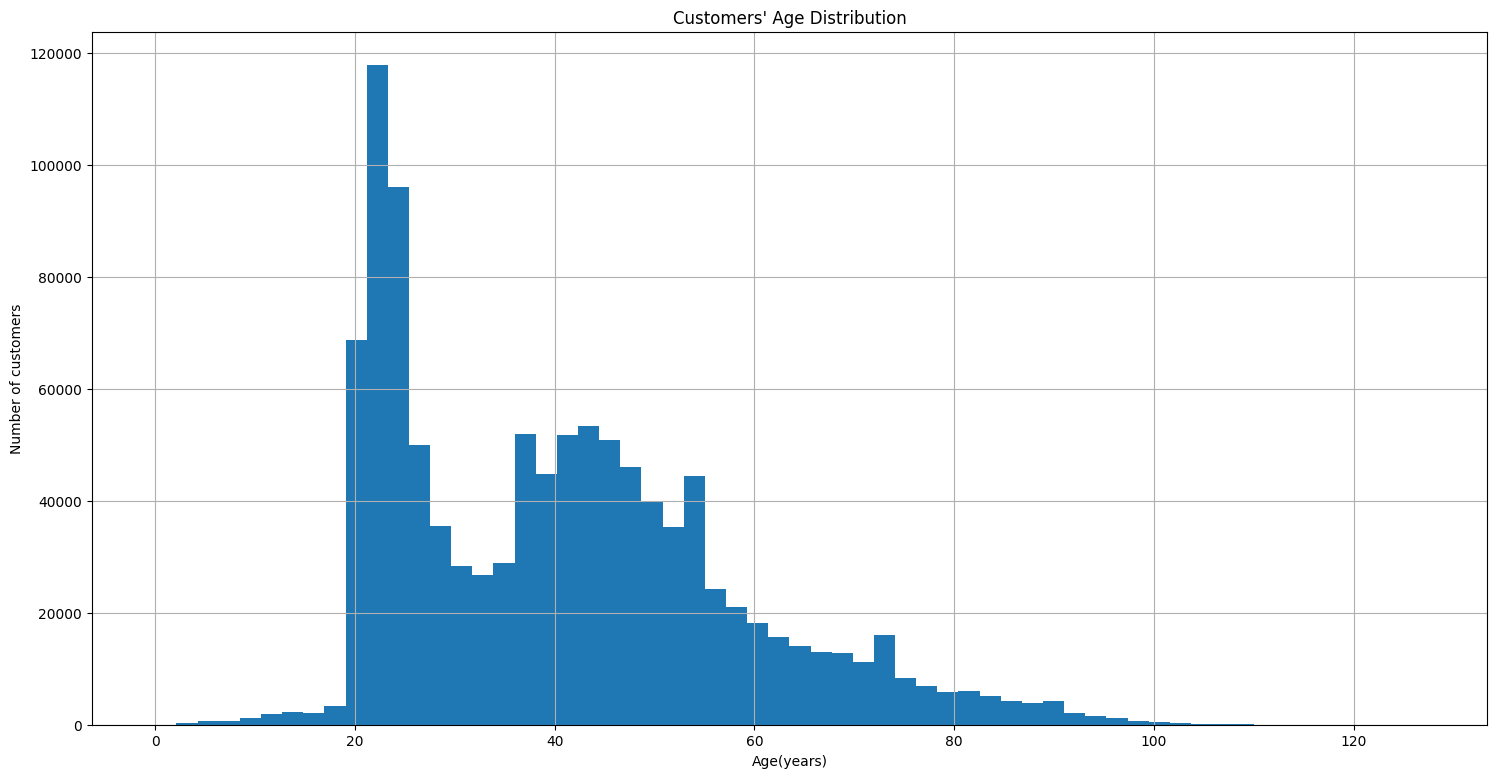

In [17]:
# Age distribuion of customers
plt.figure(figsize=(18,9))
df['customer_age'].hist(bins=60)
plt.title("Customers' Age Distribution")
plt.xlabel("Age(years)")
plt.ylabel("Number of customers") ;

It's interesting that the distribution is bimodal. There are a large number of university aged students, and then another peak around middle-age. 

In [18]:
# Customer attraction by channel
df['channel_used_join'].value_counts(normalize=True).head(15)

KHE    0.306298
KAT    0.255559
KFC    0.239331
KFA    0.033062
KHQ    0.022468
KHK    0.017727
KHD    0.008926
KAS    0.006966
KHM    0.006582
KAG    0.006272
RED    0.005378
KAA    0.005255
KHN    0.005210
KAY    0.005118
KAB    0.005019
Name: channel_used_join, dtype: float64

We can see that the most popular customer attraction channels are : 'KHE', 'KAT' and 'KFC'.

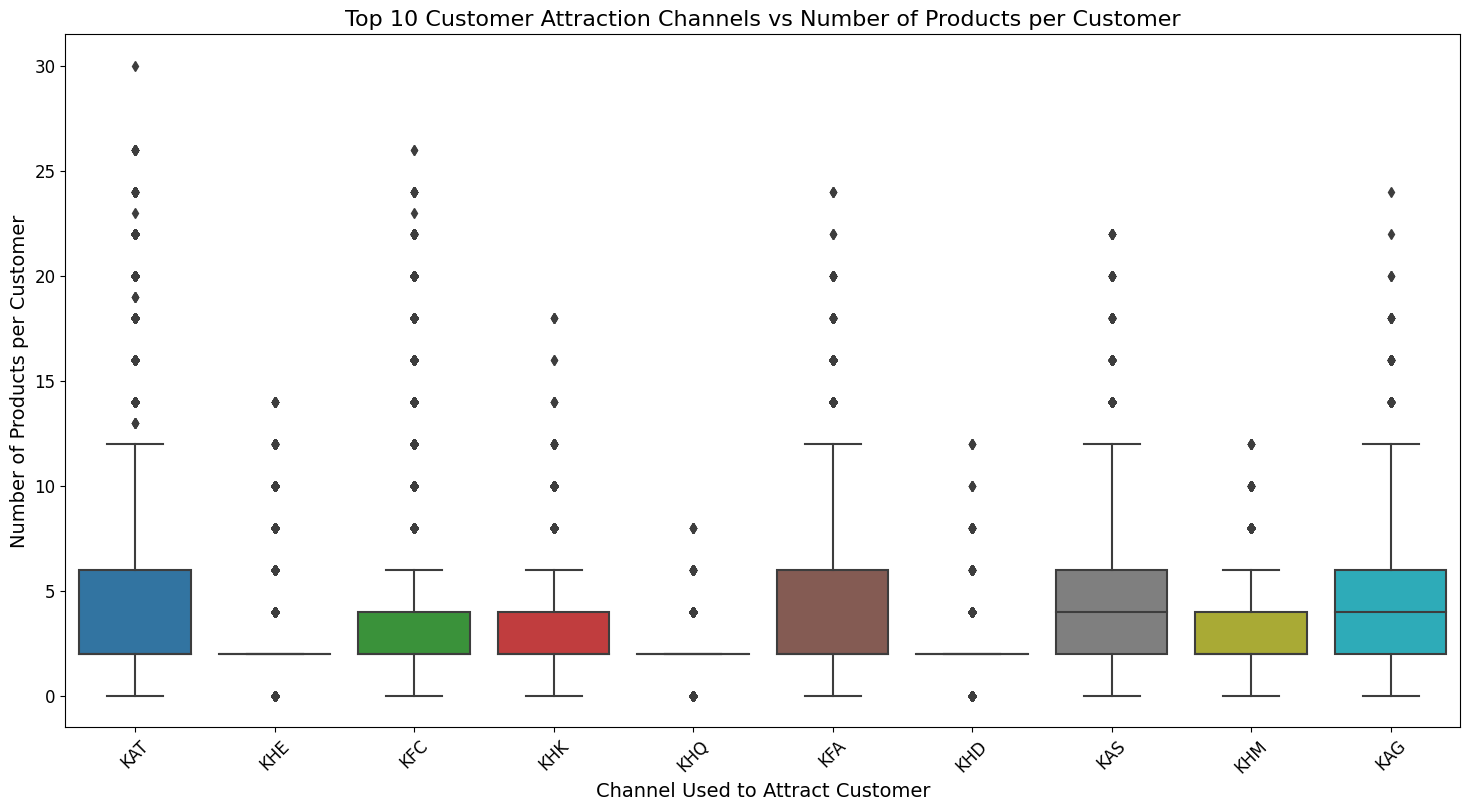

In [19]:
# Examine the relationship between the customer attraction channel and the number of products per customer
import seaborn as sns

top_10_channels = df['channel_used_join'].value_counts().head(10).index.tolist()

plt.figure(figsize=(18,9))
sns.boxplot(x='channel_used_join', y=df.iloc[:, 23:].sum(axis=1), data=df[df['channel_used_join'].isin(top_10_channels)])
plt.title("Top 10 Customer Attraction Channels vs Number of Products per Customer", fontsize=16)
plt.xlabel("Channel Used to Attract Customer", fontsize=14)
plt.ylabel("Number of Products per Customer", fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12) ;

The boxplot above shows the relationship between the top 10 customer attraction channels and the number of products per customer. It appears that customers who were attracted through channels such as 'KHE', 'KAT', and 'KFC' tend to have a higher number of products per customer compared to those who were attracted through other channels. However, it's important to note that there are outliers in each channel group, indicating that there are customers who have a high number of products regardless of the channel used to attract them. Overall, this visualization suggests that the customer attraction channel may have some influence on the number of products per customer, but it's not the only factor at play.

In [20]:
# Total number of products per customer
df["total_products"].value_counts()

1.0     556985
0.0     190776
2.0     159808
3.0      65472
4.0      38710
5.0      25443
6.0      18613
7.0      12570
8.0       6835
9.0       3041
10.0      1201
11.0       402
12.0       105
13.0        24
15.0         1
Name: total_products, dtype: int64

Most of the customers used one or two products and rarely use more than five products.


In [21]:
# Total number of products by age
tdf = df.groupby(['customer_age'])['total_products'].agg('sum')
tdf.sort_values(ascending=False).head(20)

customer_age
23    57700.0
24    57026.0
43    54573.0
45    54491.0
44    54077.0
46    52090.0
42    51435.0
22    51247.0
47    49131.0
41    48133.0
48    47365.0
40    43395.0
49    42373.0
21    41873.0
50    39621.0
39    38215.0
25    37562.0
51    36600.0
52    34738.0
53    33468.0
Name: total_products, dtype: float64

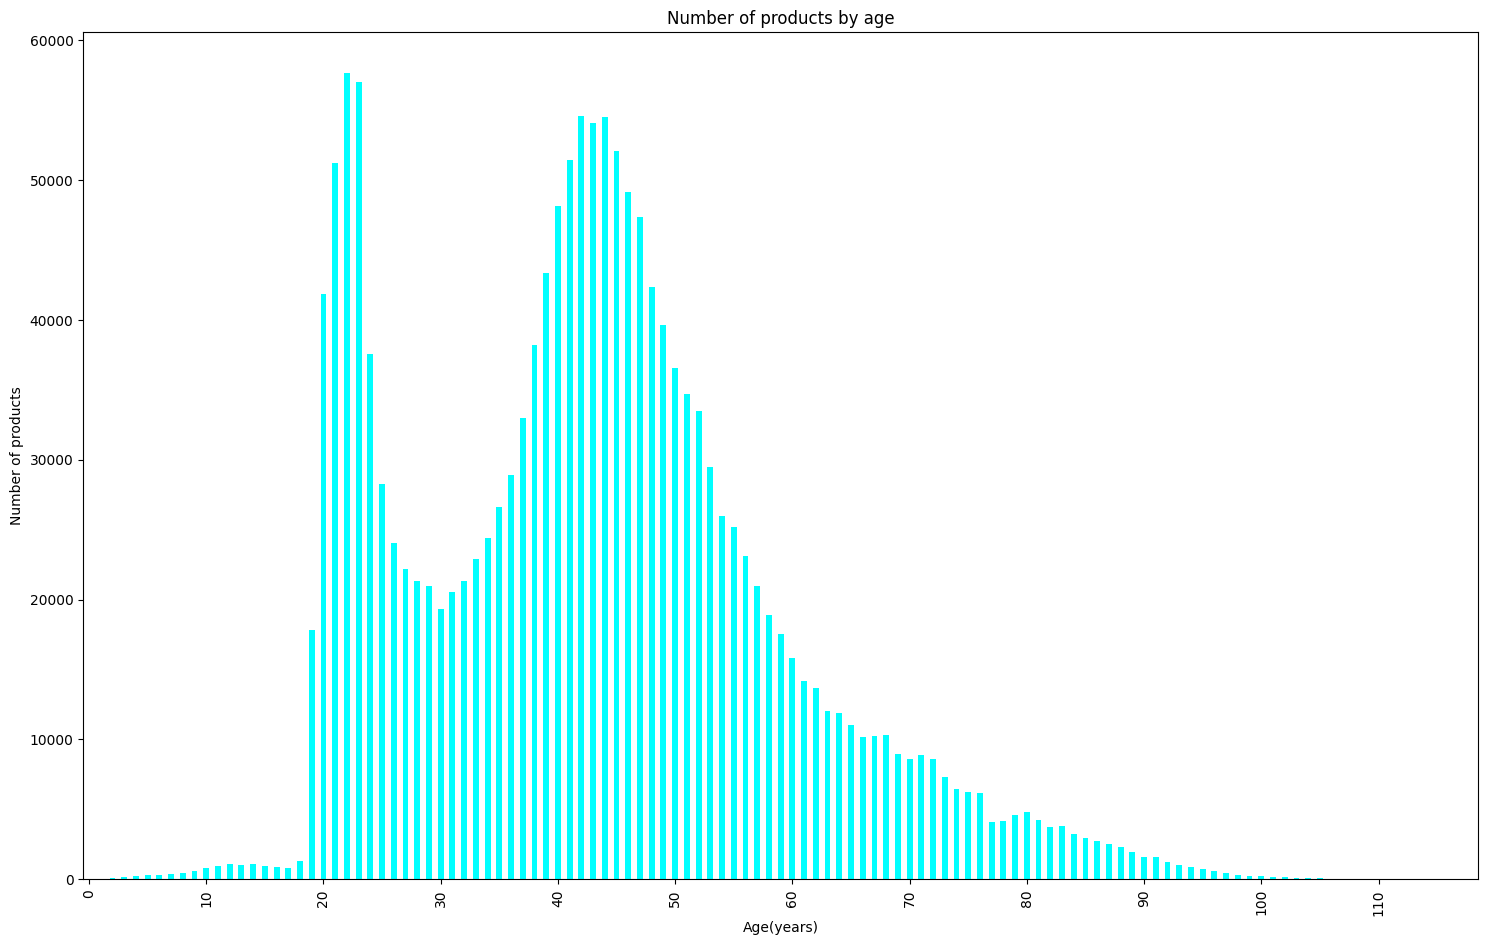

In [22]:
# Number of products by age 
plt.figure(figsize=(18,11))
tdf.plot(kind='bar', colormap='cool', legend=None) 
plt.xticks(np.arange(0, 120, 10), [str(x) for x in np.arange(0, 120, 10)])
plt.title('Number of products by age') 
plt.xlabel('Age(years)') 
plt.ylabel('Number of products');

As we see bimodal distribution with most of the products used by middle aged customers between 35 and 55 years old, followed by young customers in thier twenties.

In [23]:
# Number of products by customer regularity
tdf = df.groupby(['primary_customer_index'])['total_products'].agg('count')
tdf

primary_customer_index
0.0           3
1.0     1079207
99.0        776
Name: total_products, dtype: int64

Almost all customers are primary customers throughout the month

In [24]:
# Number of products by "Customer relation type at the beginning of the month"
tdf = df.groupby(['customer_relation_beginning_month'])['total_products'].agg('count') 
tdf

customer_relation_beginning_month
0         3
A    501269
I    578713
P         1
Name: total_products, dtype: int64

Almost all customers are separated between active and inactive groups


In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1079986 entries, 0 to 1364999
Data columns (total 47 columns):
 #   Column                             Non-Null Count    Dtype  
---  ------                             --------------    -----  
 0   date_partition                     1079986 non-null  object 
 1   customer_code                      1079986 non-null  int64  
 2   employee_index                     1079986 non-null  object 
 3   customer_country_residence         1079986 non-null  object 
 4   customer_sex                       1079986 non-null  object 
 5   customer_age                       1079986 non-null  Int64  
 6   customer_join_date                 1079986 non-null  object 
 7   new_customer_index                 1079986 non-null  float64
 8   customer_seniority                 1079986 non-null  Int64  
 9   primary_customer_index             1079986 non-null  float64
 10  customer_type_beginning_month      1079986 non-null  object 
 11  customer_relation_beginn

In [26]:
# Total number of products by gross_income_household

# Create income groups
tdf = (df.groupby(pd.cut(df['gross_income_household'], [0,60000,120000,180000,240000, pd.np.inf], right=False)).sum())
tdf = tdf.loc[:, "savings_account": "direct_debit"]
# Total products by income group
tdf


,savings_account,guarantees,current_accounts,derivada_account,payroll_account,junior_account,mas_particular_account,particular_account,particular_plus_account,short_term_deposits,medium_term_deposits,long_term_deposits,e_account,funds,mortgage,pensions_a,loans,taxes,credit_card,securities,home_account,payroll,pensions_b,direct_debit
gross_income_household,,,,,,,,,,,,,,,,,,,,,,,,
"[0.0, 60000.0)",13,2,134711,58,12846,928,1343,16354,4908,252,216,4655,10855,1761,845,795,707,6842,5245,2391,394,8466.0,9144.0,21367
"[60000.0, 120000.0)",23,6,309313,145,37705,3963,4143,55772,19285,775,821,18805,37838,7073,2969,3265,1343,22262,19339,9549,1540,25647.0,27636.0,60218
"[120000.0, 180000.0)",27,5,141698,105,23373,3076,2336,37858,13016,445,443,13559,24471,5672,1777,2930,456,15278,13897,7700,1127,16365.0,17629.0,34723
"[180000.0, 240000.0)",23,11,61515,59,11052,1618,1168,19512,6757,182,265,7294,12219,3212,828,1763,150,8300,7013,4633,688,7789.0,8548.0,16337
"[240000.0, inf)",21,7,61712,51,10593,1342,1022,20002,6955,125,200,6268,12056,3874,750,2078,158,9642,7196,5252,804,6908.0,7894.0,16463


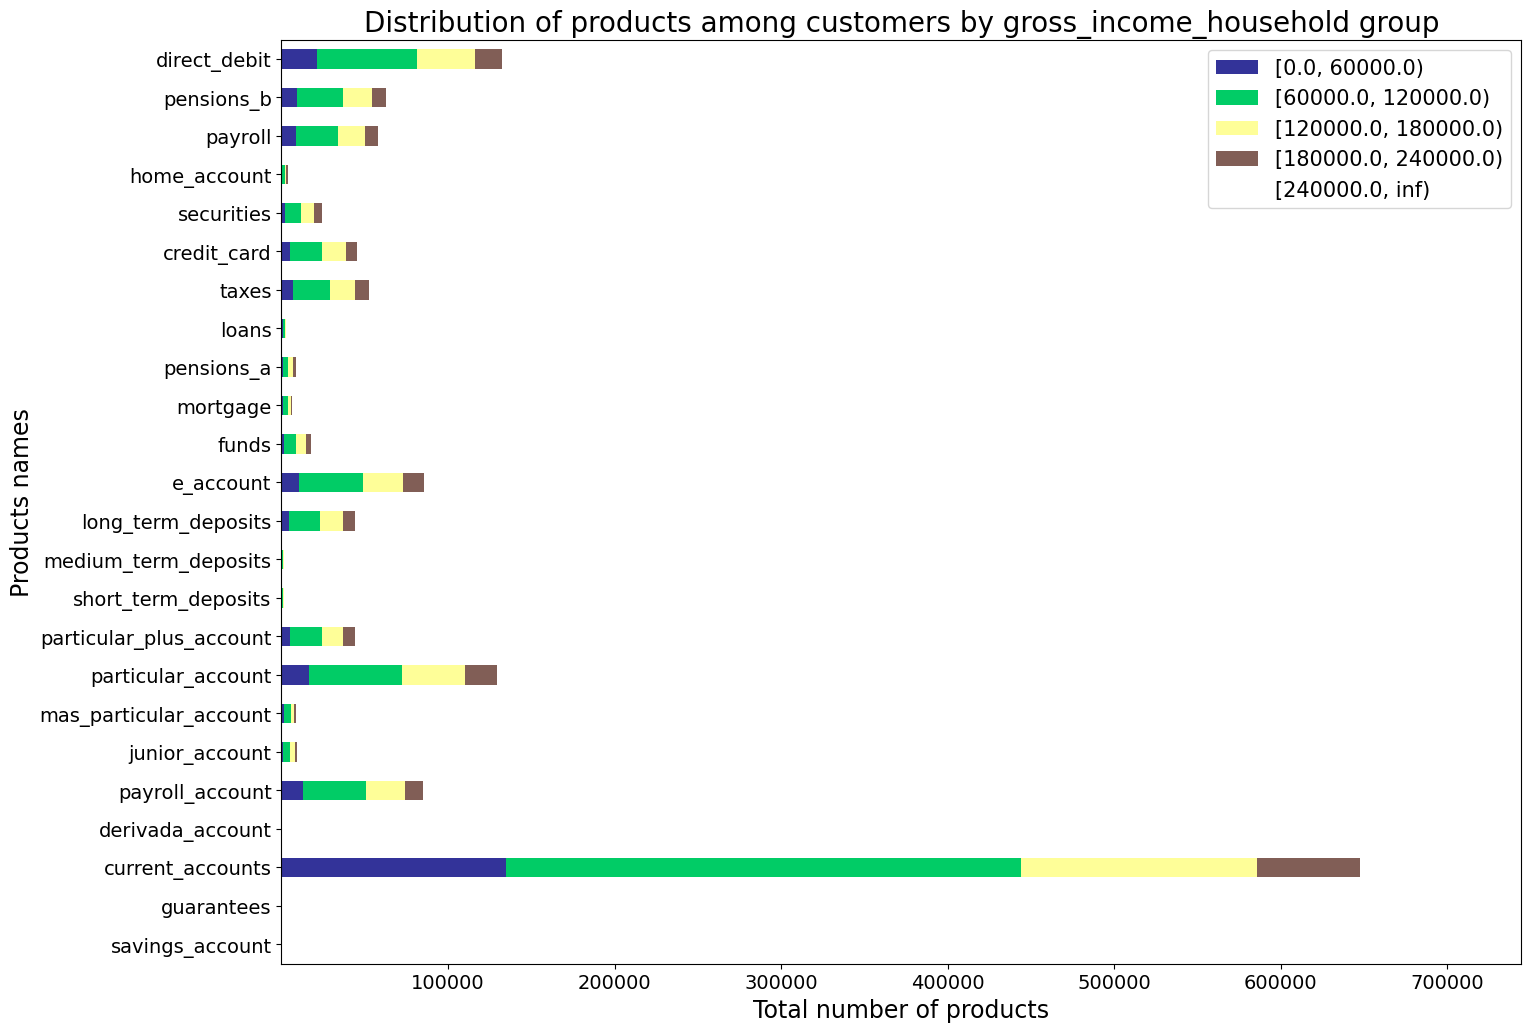

In [27]:
# Plot of product share for each gross_income_household group
tdf =tdf.transpose()
tdf.plot(kind='barh', stacked=True, fontsize=14, figsize=[16,12], colormap='terrain')
plt.title('Distribution of products among customers by gross_income_household group', fontsize=20, color='black') 
plt.xlabel('Total number of products', fontsize=17, color='black') 
plt.ylabel('Products names', fontsize=17, color='black') 
plt.legend(prop={'size':15}, loc=1);

The visualization above shows the distribution of products among customers by gross_income_household group. The income groups are divided into 5 categories: 0-60,000, 60,000-120,000, 120,000-180,000, 180,000-240,000, and above 240,000. 

From the visualization, we can infer that customers with higher gross income tend to have more products with the bank. The group with the highest gross income (above 240,000) has the highest number of products, while the group with the lowest gross income (0-60,000) has the lowest number of products. 

The most popular products among all income groups are current accounts, followed by savings accounts and payroll accounts. The least popular products are securities and mortgages, which are only held by a small percentage of customers across all income groups.

In [28]:
# Total number of products by segmentation
tdf = df.groupby(['segmentation'])['total_products'].agg('sum') 
tdf

segmentation
0                           0.0
01 - TOP               201691.0
02 - PARTICULARES     1061074.0
03 - UNIVERSITARIO     392043.0
Name: total_products, dtype: float64

PARTICULARES are the most important group


In [29]:
# Total number of products by customer index
tdf = df.groupby(['new_customer_index'])['total_products'].agg('count') 
tdf

new_customer_index
0.0    1054153
1.0      25833
Name: total_products, dtype: int64

Most customers are recurrent customers, older than six months

In [30]:
# Total number of products by age group
tdf = (df.groupby(pd.cut(df['customer_age'], [0,20,40,60,80,100, pd.np.inf], right=False)).sum())
tdf = tdf.loc[:, "savings_account": "direct_debit"]
tdf

,savings_account,guarantees,current_accounts,derivada_account,payroll_account,junior_account,mas_particular_account,particular_account,particular_plus_account,short_term_deposits,medium_term_deposits,long_term_deposits,e_account,funds,mortgage,pensions_a,loans,taxes,credit_card,securities,home_account,payroll,pensions_b,direct_debit
customer_age,,,,,,,,,,,,,,,,,,,,,,,,
"[0.0, 20.0)",0,0,495,0,1,10809,0,0,0,0,0,22,0,0,1,0,0,27,0,0,0,6.0,47.0,0
"[20.0, 40.0)",3,9,398815,48,32519,118,3327,15624,8797,472,230,5550,24002,1814,409,559,583,14342,9715,3274,1014,21464.0,21830.0,50888
"[40.0, 60.0)",94,22,224059,284,53319,0,5081,89402,33273,1004,1301,29287,55118,13252,6209,8258,1824,40160,36008,19552,3319,40235.0,41120.0,82907
"[60.0, 80.0)",10,0,67910,74,8489,0,1309,32191,7339,243,298,12318,15319,5232,545,1980,387,6772,6572,5616,179,3404.0,6842.0,13451
"[80.0, 100.0)",0,0,17117,12,1233,0,295,11749,1487,60,116,3375,2974,1277,5,34,19,997,389,1075,41,65.0,1007.0,1838
"[100.0, inf)",0,0,553,0,8,0,0,532,25,0,0,29,26,17,0,0,1,26,6,8,0,1.0,5.0,24


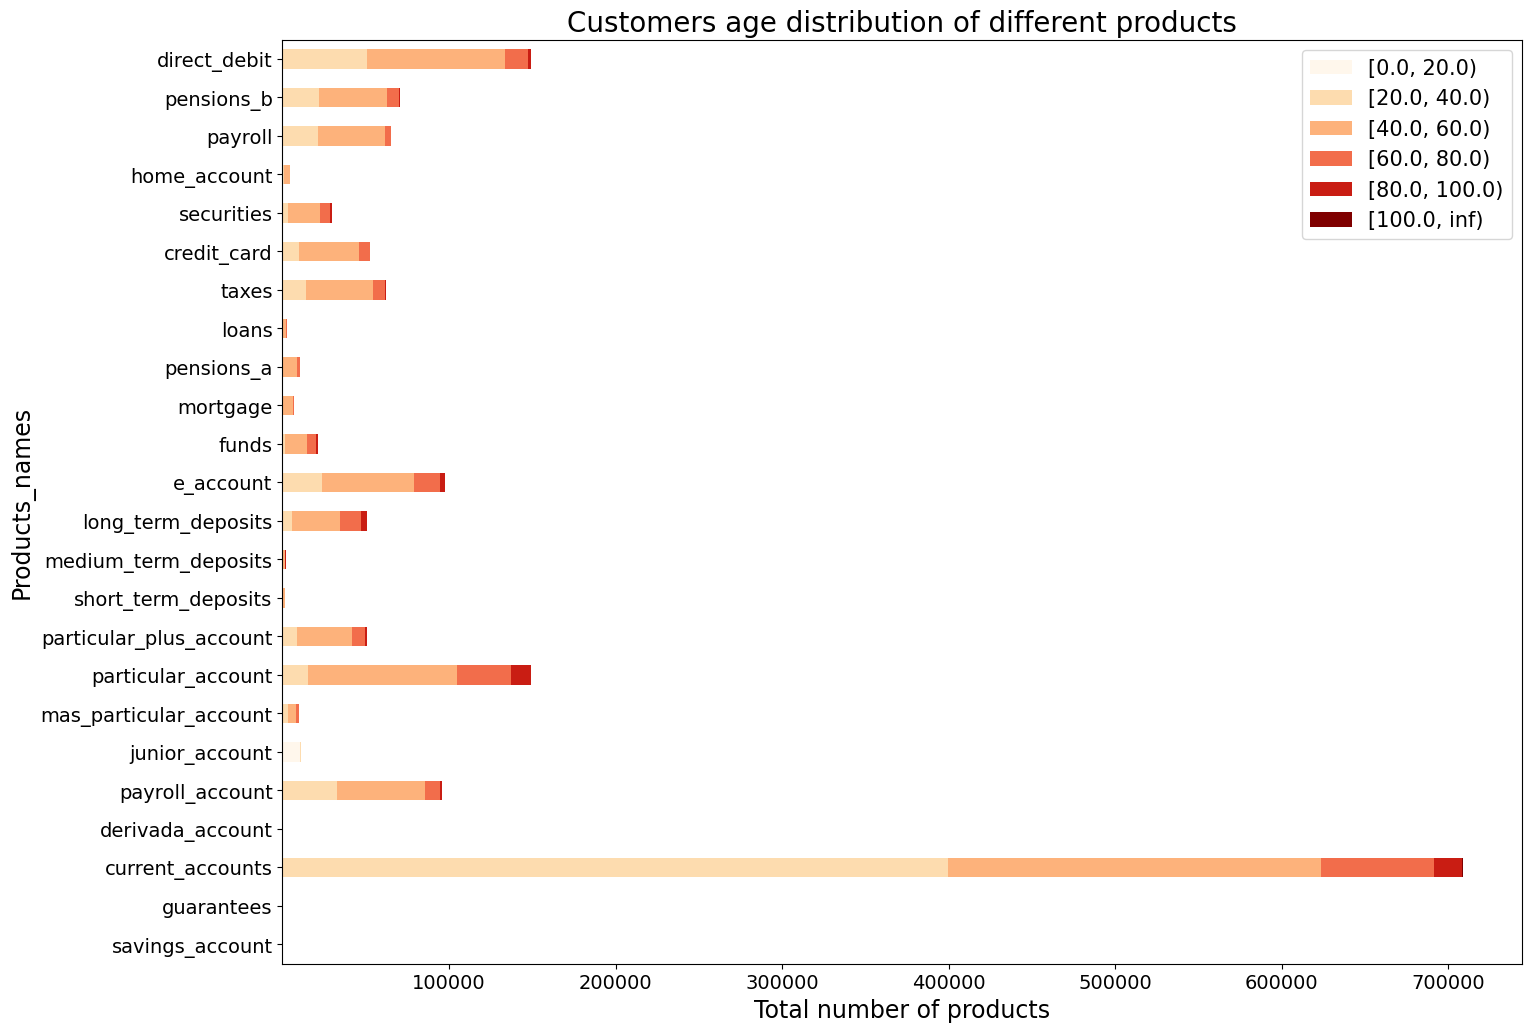

In [31]:
# Plot of customers' age distibution of each product 
tdf =tdf.transpose()
tdf.plot(kind='barh', stacked=True, fontsize=14, figsize=[16,12], colormap='OrRd')
plt.title('Customers age distribution of different products', fontsize=20, color='black') 
plt.xlabel('Total number of products', fontsize=17, color='black') 
plt.ylabel('Products_names', fontsize=17, color='black') 
plt.legend(prop={'size':15}, loc=1); 

The visualization above shows the distribution of customers' age for each product. From the plot, we can infer that:
- The majority of customers who have a mortgage are between 40 and 60 years old.
- Customers who have a payroll account, pensions, and direct debit are mostly between 20 and 60 years old.
- Customers who have short-term deposits, medium-term deposits, and long-term deposits are mostly between 40 and 80 years old.
- Customers who have securities are mostly between 60 and 80 years old.
- Customers who have e-account, funds, and credit card are mostly between 20 and 40 years old.
- Customers who have home account, taxes, and loans are mostly between 20 and 60 years old.

In [32]:
# Total number of products by province name amd province code
tdf = df.groupby(['province_name', 'province_code'])['total_products'].agg('count') 
tdf = tdf.sort_values(ascending=False)
tdf.head(20)

province_name  province_code
MADRID         28               390781
BARCELONA      8                106821
VALENCIA       46                54638
SEVILLA        41                51255
CORUÑA, A      15                31015
ZARAGOZA       50                29091
MALAGA         29                28771
MURCIA         30                28746
ALICANTE       3                 23475
CADIZ          11                23175
VALLADOLID     47                21187
ASTURIAS       33                20024
PONTEVEDRA     36                19638
PALMAS, LAS    35                17683
BADAJOZ        6                 15130
TOLEDO         45                14746
GRANADA        18                14091
SALAMANCA      37                12966
CORDOBA        14                11597
CANTABRIA      39                11191
Name: total_products, dtype: int64

The output above shows the total number of products by province name and province code. The table is sorted in descending order, and the top 20 provinces with the highest number of products are displayed. From the table, we can infer that:
- Madrid (28) has the highest number of products, followed by Barcelona (8) and Valencia (46).
- The top 20 provinces with the highest number of products are mostly located in the central and eastern regions of Spain.
- The number of products in each province varies widely, with Madrid having over 100,000 products and the 20th province having around 10,000 products.

In [33]:
# Distribution of products by segment
tdf = df.loc[:, ['segmentation']].join(df.loc[:, 'savings_account':'direct_debit'])
tdf = tdf.groupby("segmentation").agg("sum")
tdf

,savings_account,guarantees,current_accounts,derivada_account,payroll_account,junior_account,mas_particular_account,particular_account,particular_plus_account,short_term_deposits,medium_term_deposits,long_term_deposits,e_account,funds,mortgage,pensions_a,loans,taxes,credit_card,securities,home_account,payroll,pensions_b,direct_debit
segmentation,,,,,,,,,,,,,,,,,,,,,,,,
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0
01 - TOP,8,11,29109,77,15447,6,898,12357,7695,582,624,24153,22865,9464,1066,3565,90,10048,10166,9685,596,11281.0,12937.0,18961
02 - PARTICULARES,99,20,362512,337,65449,10915,8449,134547,42142,1146,1286,25312,67708,11585,5986,7111,2691,48766,39924,18964,3927,44614.0,48436.0,109148
03 - UNIVERSITARIO,0,0,317328,4,14673,6,665,2594,1084,51,35,1116,6866,543,117,155,33,3510,2600,876,30,9280.0,9478.0,20999


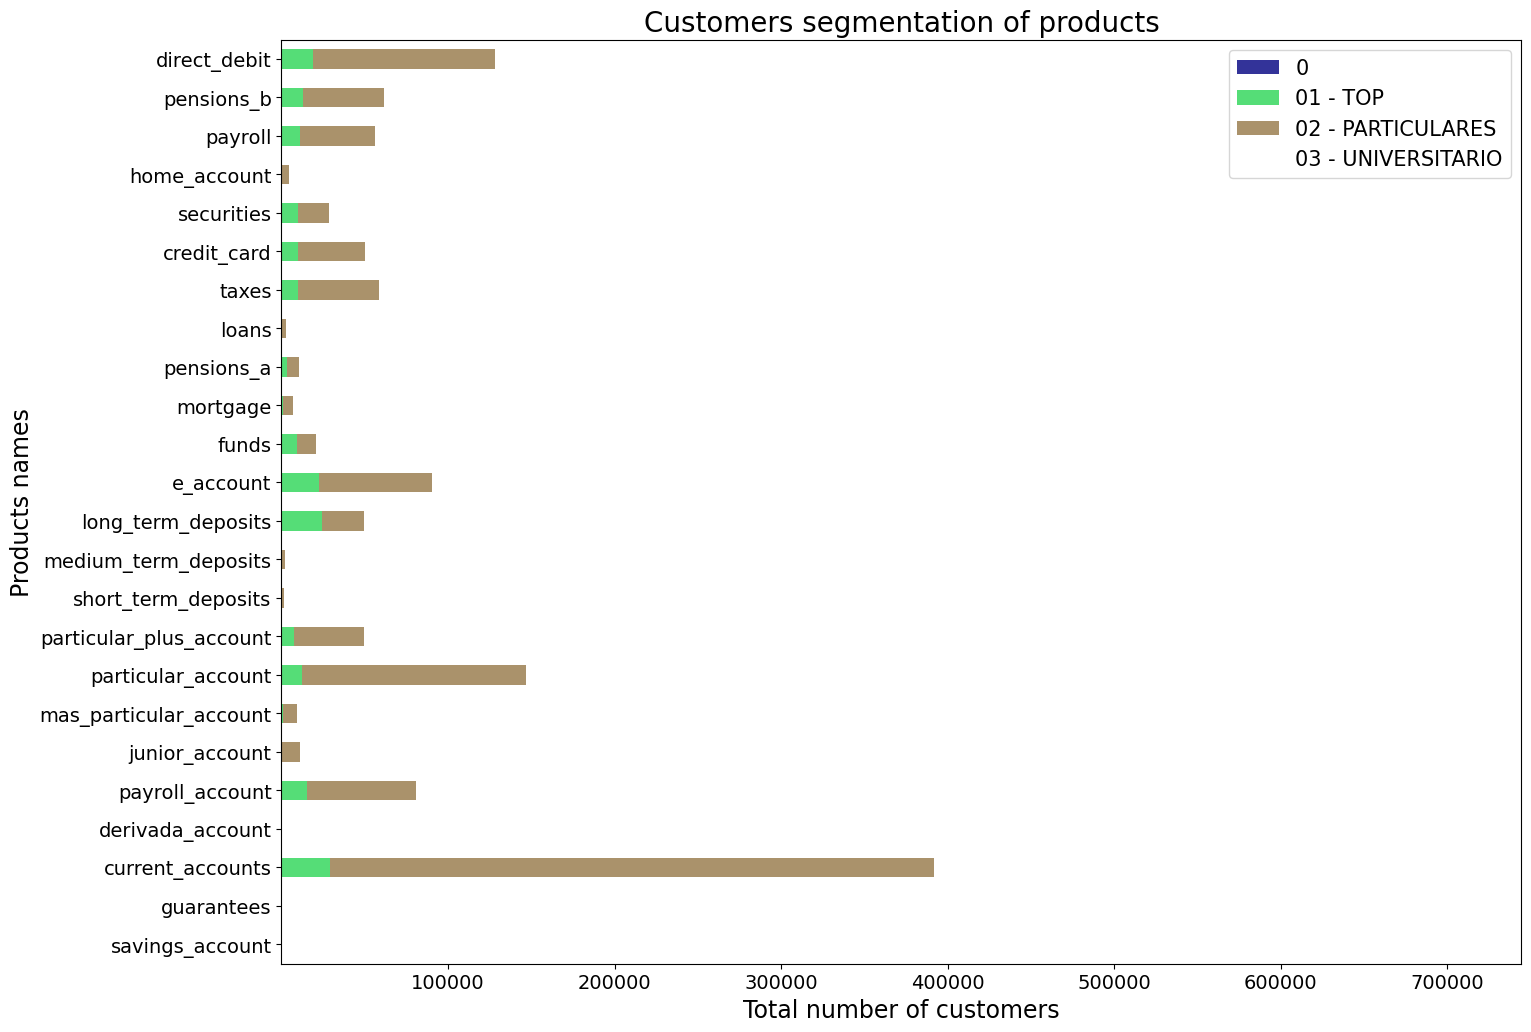

In [34]:
# Customers segment of each product
tdf = tdf.transpose()
tdf.plot(kind='barh', stacked=True, fontsize=14, figsize=[16,12], colormap='terrain')
plt.title('Customers segmentation of products', fontsize=20, color='black') 
plt.xlabel('Total number of customers', fontsize=17, color='black') 
plt.ylabel('Products names', fontsize=17, color='black') 
plt.legend(prop={'size':15}); 

The visualization above shows the customers segmentation of products. From the stacked horizontal bar chart, we can infer that:
- The majority of customers for each product belong to the "02 - PARTICULARES" segment, followed by the "" segment.
- The "03 - UNIVERSITARIO" segment has the lowest number of customers for each product.
- The distribution of customers across segments varies for each product, with some products having a more even distribution across segments while others are dominated by a single segment.
- Overall, the "02 - PARTICULARES" segment has the highest number of customers across all products, followed by the "01 - TOP" segment.

In [35]:
# Distribution of products by activity index
tdf = df.loc[:, ['activity_index']].join(df.loc[:, 'savings_account':'direct_debit'])
tdf = tdf.groupby("activity_index").agg("sum")
tdf

,savings_account,guarantees,current_accounts,derivada_account,payroll_account,junior_account,mas_particular_account,particular_account,particular_plus_account,short_term_deposits,medium_term_deposits,long_term_deposits,e_account,funds,mortgage,pensions_a,loans,taxes,credit_card,securities,home_account,payroll,pensions_b,direct_debit
activity_index,,,,,,,,,,,,,,,,,,,,,,,,
0.0,26,0,336777,34,1135,1974,2336,47489,8584,195,5,201,6528,136,21,58,514,3871,279,265,1013,175.0,199.0,869
1.0,81,31,372172,384,94434,8953,7676,102009,42337,1584,1940,50380,90911,21456,7148,10773,2300,58453,52411,29260,3540,65000.0,70652.0,148239


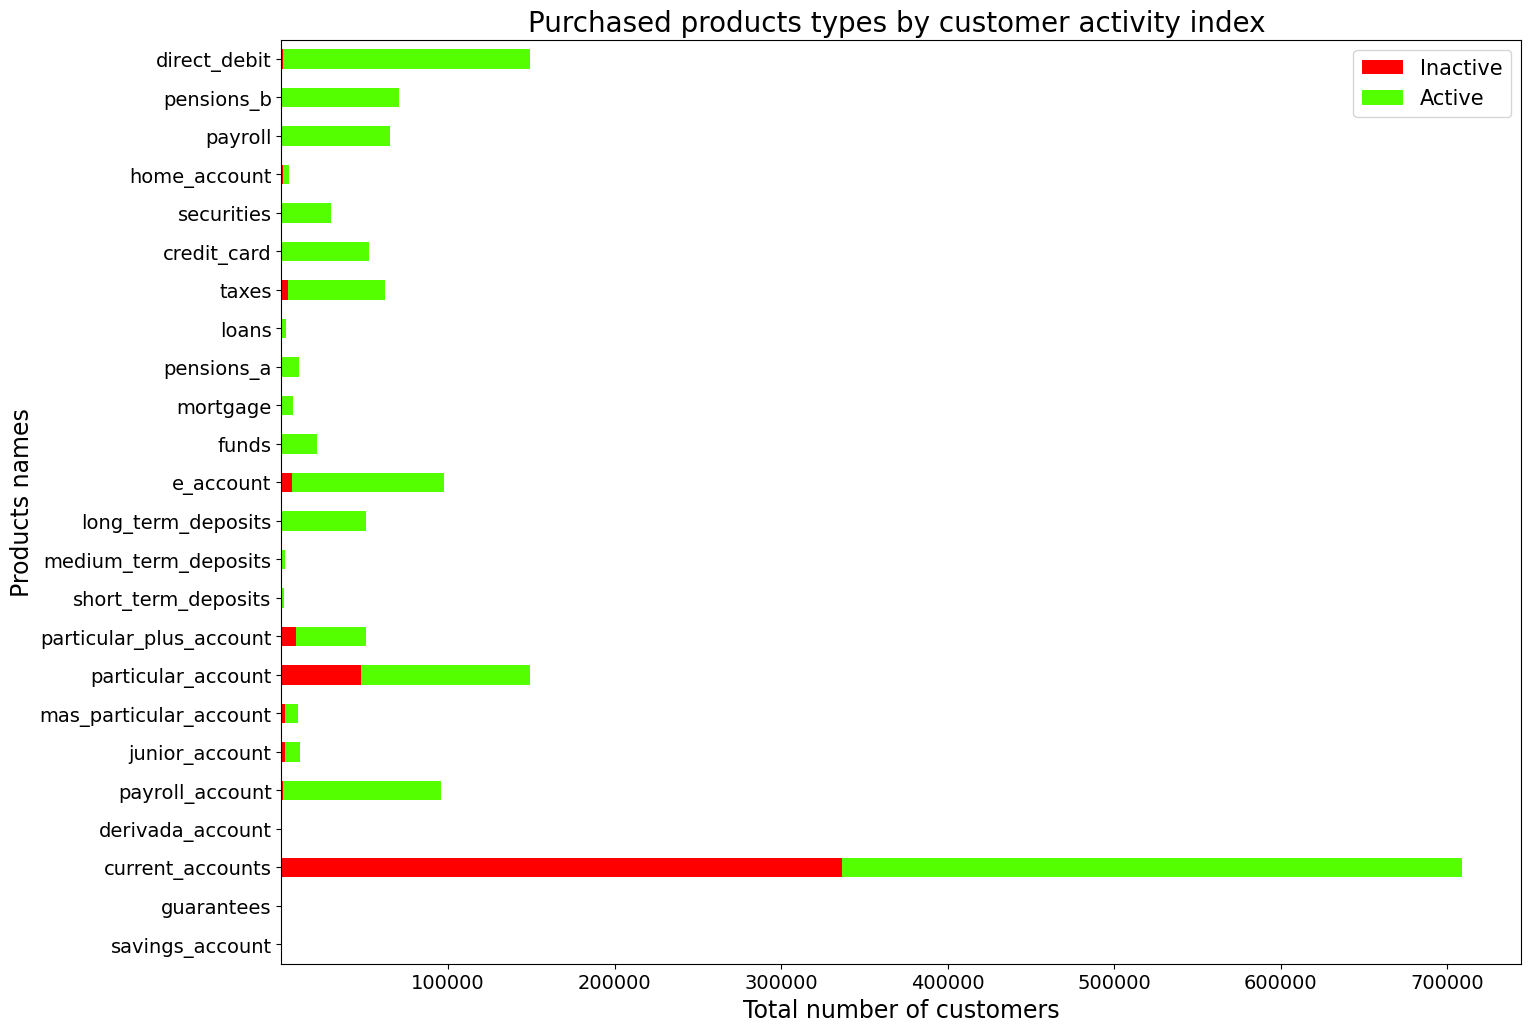

In [36]:
# Purchased products types by customer activity index
tdf = tdf.transpose()
tdf.plot(kind='barh', stacked=True, fontsize=14, figsize=[16,12], colormap='prism')
plt.title('Purchased products types by customer activity index ', fontsize=20, color='black') 
plt.xlabel('Total number of customers', fontsize=17, color='black') 
plt.ylabel('Products names', fontsize=17, color='black') 
plt.legend(["Inactive", "Active"], prop={'size':15}); 

From the visualization above, we can infer that the distribution of purchased products types varies by customer activity index. The "Active" customers have a higher number of purchased products across all product types compared to the "Inactive" customers. 

The "Active" customers have a higher number of "long_term_deposits", "funds", "mortgage", "pensions_a", "loans", "credit_card", "securities", "home_account", "payroll", "pensions_b", and "direct_debit" products compared to the "Inactive" customers. 

On the other hand, the "Inactive" customers have a higher number of "savings_account", "guarantees", "current_accounts", "derivada_account", "payroll_account", "junior_account", "mas_particular_account", "particular_account", "particular_plus_account", "short_term_deposits", "medium_term_deposits", and "e_account" products compared to the "Active" customers.

In [37]:
# Distribution of products by sex
tdf = df.loc[:, ['customer_sex']].join(df.loc[:, 'savings_account':'direct_debit'])
tdf = tdf.groupby("customer_sex").agg("sum")
tdf

,savings_account,guarantees,current_accounts,derivada_account,payroll_account,junior_account,mas_particular_account,particular_account,particular_plus_account,short_term_deposits,medium_term_deposits,long_term_deposits,e_account,funds,mortgage,pensions_a,loans,taxes,credit_card,securities,home_account,payroll,pensions_b,direct_debit
customer_sex,,,,,,,,,,,,,,,,,,,,,,,,
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0
H,26,12,328847,45,39474,5379,4043,56281,19870,755,820,20303,37782,6813,2057,4001,840,21710,18520,8659,1684,27066.0,29409.0,58976
V,81,19,380102,373,56095,5548,5969,93217,31051,1024,1125,30278,59657,14779,5112,6830,1974,40614,34170,20866,2869,38109.0,41442.0,90132


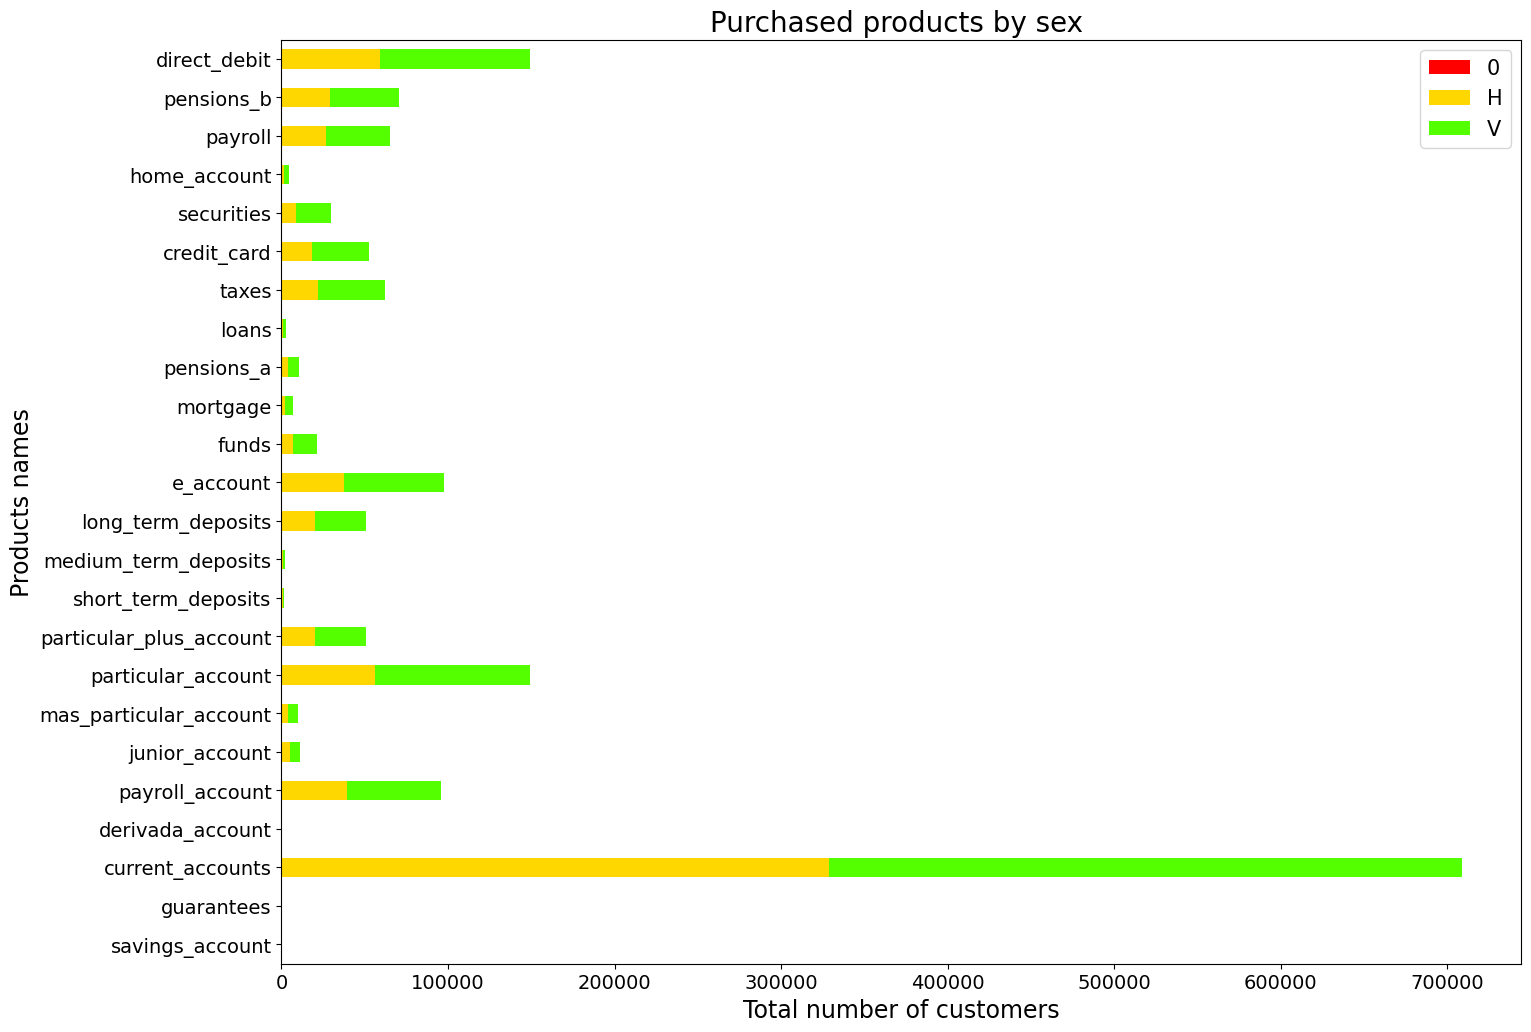

In [38]:
# Total products purchased by sex
tdf = tdf.transpose()
tdf.plot(kind='barh', stacked=True, fontsize=14, figsize=[16,12], colormap='prism')
plt.title('Purchased products by sex ', fontsize=20, color='black') 
plt.xlabel('Total number of customers', fontsize=17, color='black') 
plt.ylabel('Products names', fontsize=17, color='black') 
plt.legend(prop={'size':15});

From the visualization above, we can infer that the distribution of purchased products types varies by customer sex. The number of purchased products is higher for female customers compared to male customers across all product types. 

Overall, the most purchased products by both male and female customers are "particular_account", "current_accounts", "e_account", and "direct_debit" products.

In [39]:
# Distribution of products by channel used to join
tdf = df.loc[:, ['channel_used_join']].join(df.loc[:, 'savings_account':'direct_debit'])
subset = ["KHE", "KAT", "KFC", "KFA", "KHQ"]
tdf = tdf.loc[tdf['channel_used_join'].isin(subset)]
tdf = tdf.groupby("channel_used_join").agg("sum")
tdf

,savings_account,guarantees,current_accounts,derivada_account,payroll_account,junior_account,mas_particular_account,particular_account,particular_plus_account,short_term_deposits,medium_term_deposits,long_term_deposits,e_account,funds,mortgage,pensions_a,loans,taxes,credit_card,securities,home_account,payroll,pensions_b,direct_debit
channel_used_join,,,,,,,,,,,,,,,,,,,,,,,,
KAT,67,16,156654,204,39484,3605,2317,68648,23774,334,781,22212,43133,11564,4417,6291,861,28899,26466,15964,2323,27880.0,30773.0,59975
KFA,2,0,19620,12,4932,1258,756,6741,3269,38,123,4365,6607,926,161,361,79,3557,2629,1139,159,3383.0,3884.0,7054
KFC,17,11,143249,143,29553,5993,4788,48587,14835,221,706,15648,33722,5999,1011,2884,282,19567,16284,8250,1528,20300.0,21529.0,48051
KHE,0,0,282534,2,6713,0,15,0,0,1,1,154,870,42,0,5,13,1452,437,128,0,3616.0,3745.0,10494
KHQ,0,0,20414,0,133,0,0,0,0,2,0,4,7,0,0,0,0,6,1,1,0,55.0,57.0,292


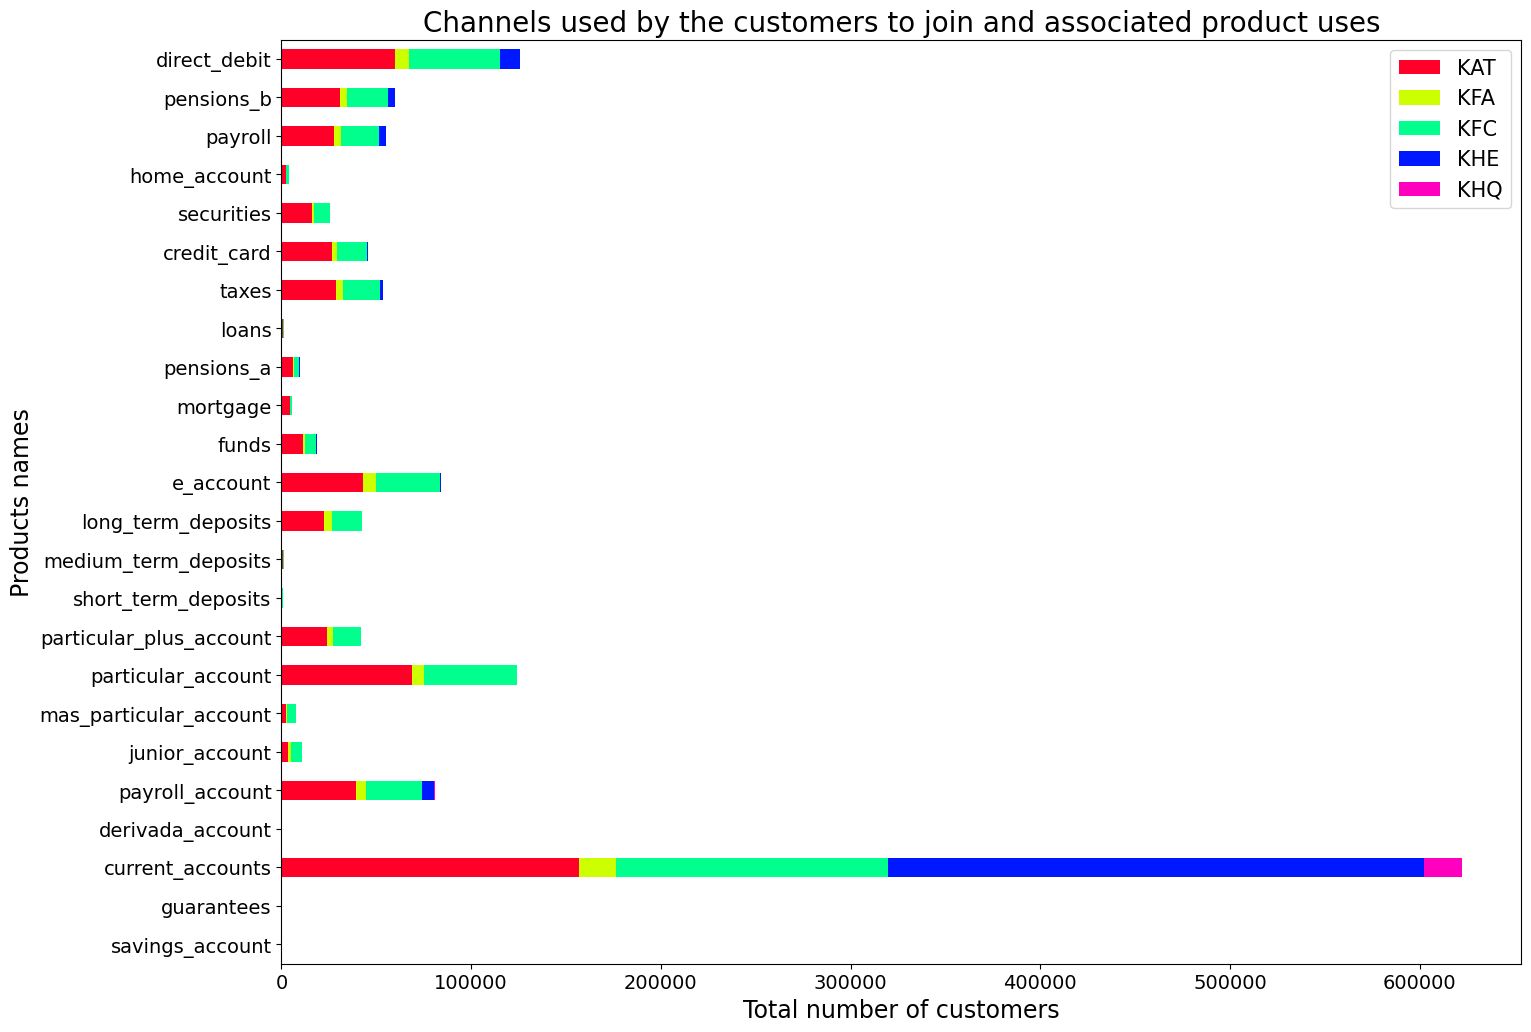

In [40]:
# Channels used by the customer to join and the purchased products
tdf = tdf.transpose()
tdf.plot(kind='barh', stacked=True, fontsize=14, figsize=[16,12], colormap='gist_rainbow')
plt.title('Channels used by the customers to join and associated product uses', fontsize=20, color='black') 
plt.xlabel('Total number of customers', fontsize=17, color='black') 
plt.ylabel('Products names', fontsize=17, color='black') 
plt.legend(prop={'size':15}) ;

From the visualization above, we can infer that the channels used by customers to join the bank are associated with the types of products they purchase. Customers who joined through channels KHE, KAT, KFC, KFA, and KHQ tend to purchase more "particular_account", "current_accounts", "e_account", and "direct_debit" products compared to other products. This information can be useful for the bank to target specific products to customers based on the channels they used to join.

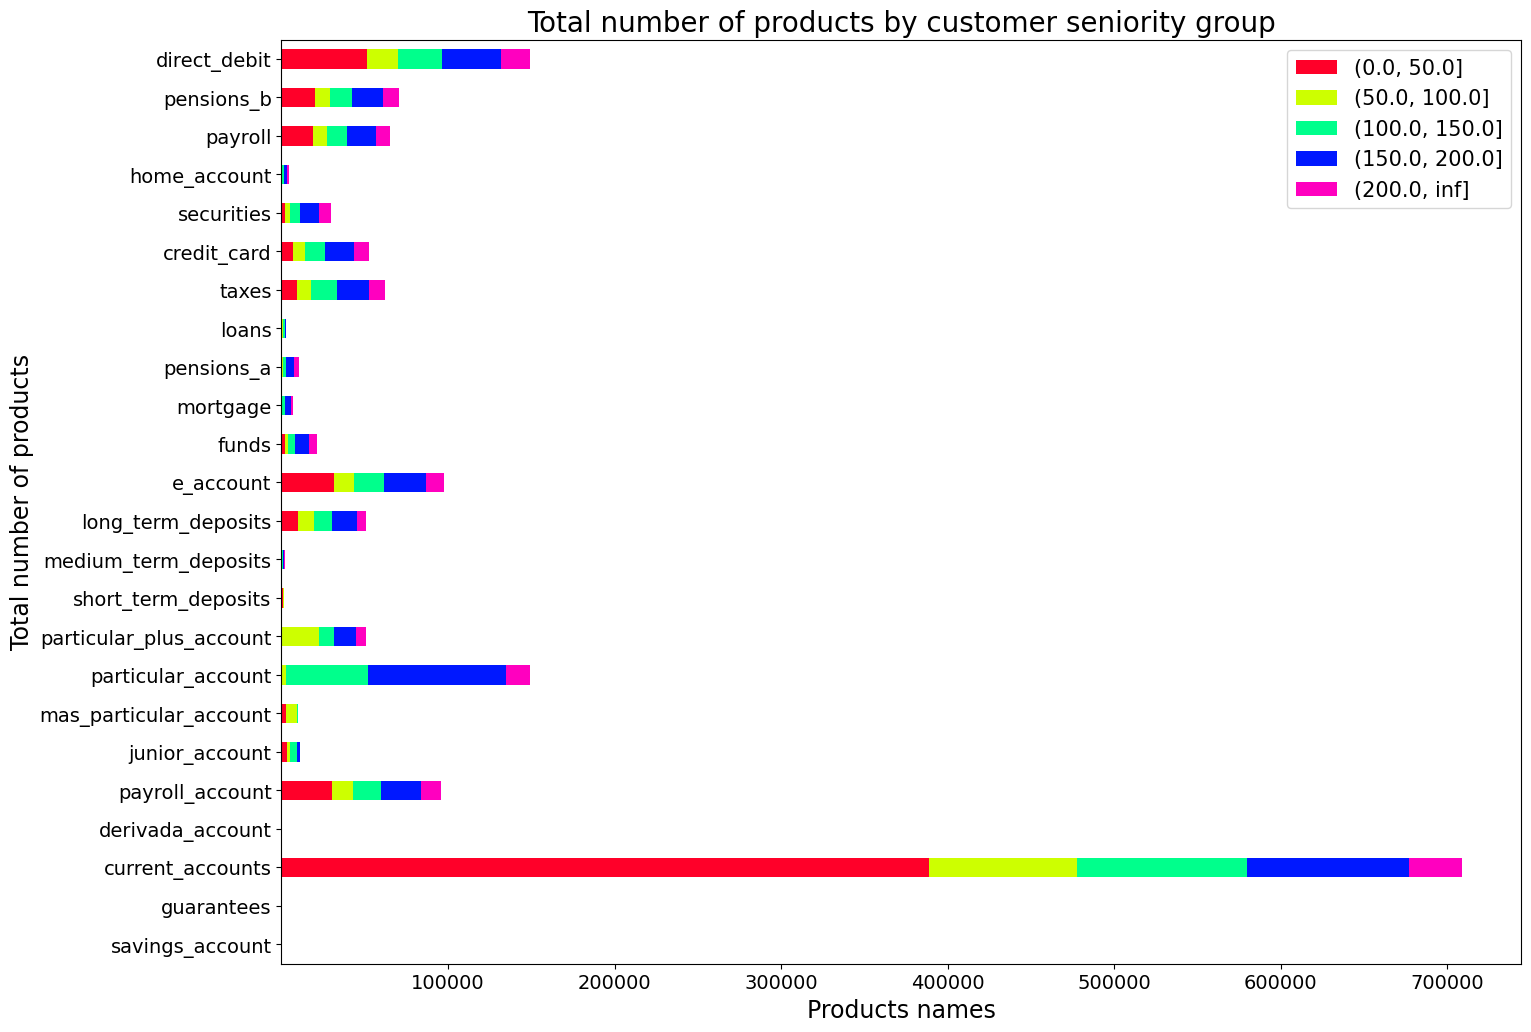

In [50]:
# Distribution of products by customer seniority group
tdf = df.loc[:, ['customer_seniority']].join(df.loc[:, 'savings_account':'direct_debit'])
tdf['customer_seniority'] = pd.cut(tdf['customer_seniority'], bins=[0, 50, 100, 150, 200, np.inf])
tdf = tdf.groupby("customer_seniority").agg("sum")
tdf = tdf.transpose()

# Plotting stacked bar chart
tdf.plot(kind='barh', stacked=True, fontsize=14, figsize=[16,12], colormap='gist_rainbow')
plt.title('Total number of products by customer seniority group', fontsize=20, color='black') 
plt.xlabel('Products names', fontsize=17, color='black') 
plt.ylabel('Total number of products', fontsize=17, color='black') 
plt.legend(prop={'size':15}) ;

From the visualization above, we can infer that the total number of products purchased by customers is positively correlated with their seniority group. Customers who have been with the bank for a longer period tend to purchase more products compared to those who have been with the bank for a shorter period. This information can be useful for the bank to target specific products to customers based on their seniority group.

## **EDA RECOMMENDATIONS**

Based on the exploratory data analysis section above, the following recommendations can be made to increase cross-selling of the banking products:

1. Target specific products to customers based on their seniority group. Customers who have been with the bank for a longer period tend to purchase more products compared to those who have been with the bank for a shorter period. Therefore, the bank can target lower seniority groups with specific products that are likely to be of interest to them.

2. Offer incentives or discounts to customers who purchase multiple products. This can encourage customers to purchase more products and increase cross-selling. Based on analysis above customers who have purchased one product are more likely to purchase another product. Therefore, offering incentives or discounts to customers who purchase multiple products can increase the likelihood of cross-selling.

3. Analyze the products that are frequently purchased together and create bundled packages to offer to customers. This can increase the likelihood of customers purchasing multiple products. For example, based on the analysis above, customers who have a savings account are more likely to have a mortgage and a pension plan. Therefore, the bank can create bundled packages that include these products to encourage customers to purchase multiple products.

4. Provide personalized recommendations to customers based on their transaction history and purchase behavior. This can increase the relevance of the recommendations and encourage customers to purchase more products. Based on the analysis above, customers who have a salary account are more likely to have a credit card and a direct debit. Therefore, the bank can provide personalized recommendations to customers who have a salary account based on their transaction history and purchase behavior to encourage them to purchase a credit card and a direct debit.

5. Conduct targeted marketing campaigns to promote specific products to customers who have not yet purchased them. This can increase awareness of the products and encourage customers to try them out. The EDA analysis shows that there are some products that have low purchase rates, such as securities and funds. Therefore, the bank can conduct targeted marketing campaigns to promote these products to customers who have not yet purchased them.

Overall, these recommendations can help the bank increase cross-selling of its products and improve its revenue.